In [ ]:
#Imports and Installs, uncomment the install for first run
#!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# LOADING DATA

In [ ]:
#Data stored in Google Drive, must authenticate to pull data
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
#01_M02_DC_train
#https://drive.google.com/file/d/1DO8bKxsTZe8gQ_zNnf6X1-9xlsWw37y2/view?usp=sharing
fileDownloaded = drive.CreateFile({'id':'1DO8bKxsTZe8gQ_zNnf6X1-9xlsWw37y2'})
fileDownloaded.GetContentFile('01_M02_DC_train.csv')

In [ ]:
#01_M02_train_fault_data
#https://drive.google.com/file/d/1dppx60e2tdu4nm2XvZ1lRlMVPnVI4cvV/view?usp=sharing
fileDownloaded = drive.CreateFile({'id':'1dppx60e2tdu4nm2XvZ1lRlMVPnVI4cvV'})
fileDownloaded.GetContentFile('01_M02_train_fault_data.csv')

In [ ]:
#01_M02_DC_train_ttf
#https://drive.google.com/file/d/1xBhlyjDhO1t_jXJLsKxP-SXD0XhKtmAU/view?usp=sharing
fileDownloaded = drive.CreateFile({'id':'1xBhlyjDhO1t_jXJLsKxP-SXD0XhKtmAU'})
fileDownloaded.GetContentFile('01_M02_DC_train_ttf.csv')

In [ ]:
df_train = pd.read_csv('01_M02_DC_train.csv', delimiter=',')
df_train.head()

,time,Tool,stage,Lot,runnum,recipe,recipe_step,IONGAUGEPRESSURE,ETCHBEAMVOLTAGE,ETCHBEAMCURRENT,...,ETCHGASCHANNEL1READBACK,ETCHPBNGASREADBACK,FIXTURETILTANGLE,ROTATIONSPEED,ACTUALROTATIONANGLE,FIXTURESHUTTERPOSITION,ETCHSOURCEUSAGE,ETCHAUXSOURCETIMER,ETCHAUX2SOURCETIMER,ACTUALSTEPDURATION
0,3283834,01M02,1,9253,10511673,67,1,-0.079428,-0.958814,-0.959509,...,-1.751661,-2.783162,2.027848,-0.013207,-0.122437,0.0,2.39537,2.871511,3.175941,4.037785
1,3283838,01M02,1,9253,10511673,67,1,-0.079419,-0.958928,-0.959651,...,-1.743905,-2.780884,2.027848,-0.013207,-0.122437,0.0,2.39537,2.871511,3.175941,4.037785
2,3283842,01M02,1,9253,10511673,67,1,-0.079409,-0.959156,-0.960006,...,-1.743905,-2.780884,2.027848,-0.013207,-0.122437,0.0,2.39537,2.871511,3.175941,4.037785
3,3283846,01M02,1,9253,10511673,67,1,-0.079420,-0.958928,-0.959297,...,-1.747158,-2.780884,2.027848,-0.013207,-0.122437,0.0,2.39537,2.871511,3.175941,4.037785
4,3283850,01M02,1,9253,10511673,67,1,-0.079430,-0.959269,-0.959438,...,-1.747158,-2.784389,2.027848,-0.013207,-0.122437,0.0,2.39537,2.871511,3.175941,4.037785


In [ ]:
print(df_train.keys())

Index(['time', 'Tool', 'stage', 'Lot', 'runnum', 'recipe', 'recipe_step',
       'IONGAUGEPRESSURE', 'ETCHBEAMVOLTAGE', 'ETCHBEAMCURRENT',
       'ETCHSUPPRESSORVOLTAGE', 'ETCHSUPPRESSORCURRENT', 'FLOWCOOLFLOWRATE',
       'FLOWCOOLPRESSURE', 'ETCHGASCHANNEL1READBACK', 'ETCHPBNGASREADBACK',
       'FIXTURETILTANGLE', 'ROTATIONSPEED', 'ACTUALROTATIONANGLE',
       'FIXTURESHUTTERPOSITION', 'ETCHSOURCEUSAGE', 'ETCHAUXSOURCETIMER',
       'ETCHAUX2SOURCETIMER', 'ACTUALSTEPDURATION'],
      dtype='object')


In [ ]:
cols_train = ['time', 'runnum', 'IONGAUGEPRESSURE', 'ETCHBEAMVOLTAGE', 'ETCHBEAMCURRENT',
       'ETCHSUPPRESSORVOLTAGE', 'ETCHSUPPRESSORCURRENT', 'FLOWCOOLFLOWRATE',
       'FLOWCOOLPRESSURE', 'ETCHGASCHANNEL1READBACK', 'ETCHPBNGASREADBACK',
       'FIXTURETILTANGLE', 'ROTATIONSPEED', 'ACTUALROTATIONANGLE',
       'FIXTURESHUTTERPOSITION', 'ETCHSOURCEUSAGE', 'ETCHAUXSOURCETIMER',
       'ETCHAUX2SOURCETIMER', 'ACTUALSTEPDURATION']

In [ ]:
df_fault = pd.read_csv('01_M02_train_fault_data.csv', delimiter=',')
df_fault.tail(20)

,time,fault_name,Tool
89,35337042,FlowCool Pressure Dropped Below Limit,01M02
90,35339442,Flowcool leak,01M02
91,35479832,FlowCool Pressure Dropped Below Limit,01M02
92,35479998,Flowcool leak,01M02
93,35667758,FlowCool Pressure Dropped Below Limit,01M02
94,35672222,FlowCool Pressure Dropped Below Limit,01M02
95,36022710,FlowCool Pressure Dropped Below Limit,01M02
96,36132446,FlowCool Pressure Dropped Below Limit,01M02
97,36134280,FlowCool Pressure Dropped Below Limit,01M02
98,36138198,Flowcool leak,01M02


In [ ]:
df_ttf = pd.read_csv('01_M02_DC_train_ttf.csv', delimiter=',')
df_ttf.tail(20)
df_ttf.notnull().sum()

time                                                  5110542
TTF_FlowCool Pressure Dropped Below Limit             4624525
TTF_Flowcool Pressure Too High Check Flowcool Pump    3761710
TTF_Flowcool leak                                     4620296
dtype: int64

In [ ]:
#Make sure the TTFs are all divisible by 4, and subtract mod 4 if not
df_ttf['TTF_FlowCool Pressure Dropped Below Limit'] = df_ttf['TTF_FlowCool Pressure Dropped Below Limit'].sub(df_ttf['TTF_FlowCool Pressure Dropped Below Limit'] % 4)
df_ttf['TTF_Flowcool Pressure Too High Check Flowcool Pump'] = df_ttf['TTF_Flowcool Pressure Too High Check Flowcool Pump'].sub(df_ttf['TTF_Flowcool Pressure Too High Check Flowcool Pump'] % 4)
df_ttf['TTF_Flowcool leak'] = df_ttf['TTF_Flowcool leak'].sub(df_ttf['TTF_Flowcool leak'] % 4)

df_fault['time'] = df_fault['time'].sub(df_fault['time'] % 4)
#sanity check
print(df_ttf.loc[df_ttf['TTF_FlowCool Pressure Dropped Below Limit'].isin([1, 2, 3])])
print(df_ttf.loc[df_ttf['TTF_Flowcool Pressure Too High Check Flowcool Pump'].isin([1, 2, 3])])
print(df_ttf.loc[df_ttf['TTF_Flowcool leak'].isin([1, 2, 3])])

Empty DataFrame
Columns: [time, TTF_FlowCool Pressure Dropped Below Limit, TTF_Flowcool Pressure Too High Check Flowcool Pump, TTF_Flowcool leak]
Index: []
Empty DataFrame
Columns: [time, TTF_FlowCool Pressure Dropped Below Limit, TTF_Flowcool Pressure Too High Check Flowcool Pump, TTF_Flowcool leak]
Index: []
Empty DataFrame
Columns: [time, TTF_FlowCool Pressure Dropped Below Limit, TTF_Flowcool Pressure Too High Check Flowcool Pump, TTF_Flowcool leak]
Index: []


In [ ]:
#Join the 3 tables and make a new dataframe 

In [ ]:
df_train.shape

(5110542, 24)

In [ ]:
df_train.set_index('time')
df_fault.set_index('time')
df_ttf.set_index('time')
df = pd.concat([df_train, df_ttf], axis=1, join = 'inner')
df.columns = ['time', 'Tool', 'stage', 'Lot', 'runnum', 'recipe', 'recipe_step','IONGAUGEPRESSURE', 'ETCHBEAMVOLTAGE', 'ETCHBEAMCURRENT',
              'ETCHSUPPRESSORVOLTAGE', 'ETCHSUPPRESSORCURRENT', 'FLOWCOOLFLOWRATE','FLOWCOOLPRESSURE', 'ETCHGASCHANNEL1READBACK', 'ETCHPBNGASREADBACK',
              'FIXTURETILTANGLE', 'ROTATIONSPEED', 'ACTUALROTATIONANGLE','FIXTURESHUTTERPOSITION', 'ETCHSOURCEUSAGE', 'ETCHAUXSOURCETIMER','ETCHAUX2SOURCETIMER', 
              'ACTUALSTEPDURATION', 'time_drop','TTF_FlowCool Pressure Dropped Below Limit','TTF_Flowcool Pressure Too High Check Flowcool Pump','TTF_Flowcool leak']
#drop excess "time" column by position
df = df.drop(df.columns[24],axis = 1)
df.set_index('time')
df.head(5)

,time,Tool,stage,Lot,runnum,recipe,recipe_step,IONGAUGEPRESSURE,ETCHBEAMVOLTAGE,ETCHBEAMCURRENT,...,ROTATIONSPEED,ACTUALROTATIONANGLE,FIXTURESHUTTERPOSITION,ETCHSOURCEUSAGE,ETCHAUXSOURCETIMER,ETCHAUX2SOURCETIMER,ACTUALSTEPDURATION,TTF_FlowCool Pressure Dropped Below Limit,TTF_Flowcool Pressure Too High Check Flowcool Pump,TTF_Flowcool leak
0,3283834,01M02,1,9253,10511673,67,1,-0.079428,-0.958814,-0.959509,...,-0.013207,-0.122437,0.0,2.39537,2.871511,3.175941,4.037785,623232.0,9146468.0,632512.0
1,3283838,01M02,1,9253,10511673,67,1,-0.079419,-0.958928,-0.959651,...,-0.013207,-0.122437,0.0,2.39537,2.871511,3.175941,4.037785,623228.0,9146464.0,632508.0
2,3283842,01M02,1,9253,10511673,67,1,-0.079409,-0.959156,-0.960006,...,-0.013207,-0.122437,0.0,2.39537,2.871511,3.175941,4.037785,623224.0,9146460.0,632504.0
3,3283846,01M02,1,9253,10511673,67,1,-0.079420,-0.958928,-0.959297,...,-0.013207,-0.122437,0.0,2.39537,2.871511,3.175941,4.037785,623220.0,9146456.0,632500.0
4,3283850,01M02,1,9253,10511673,67,1,-0.079430,-0.959269,-0.959438,...,-0.013207,-0.122437,0.0,2.39537,2.871511,3.175941,4.037785,623216.0,9146452.0,632496.0


In [ ]:
df.shape

(5110542, 27)

In [ ]:
df_combined = pd.concat([df, df_fault], axis=1, join = 'outer')
df_combined.columns = ['time', 'Tool', 'stage', 'Lot', 'runnum', 'recipe', 'recipe_step','IONGAUGEPRESSURE', 'ETCHBEAMVOLTAGE', 'ETCHBEAMCURRENT',
                       'ETCHSUPPRESSORVOLTAGE', 'ETCHSUPPRESSORCURRENT', 'FLOWCOOLFLOWRATE','FLOWCOOLPRESSURE', 'ETCHGASCHANNEL1READBACK', 'ETCHPBNGASREADBACK',
                       'FIXTURETILTANGLE', 'ROTATIONSPEED', 'ACTUALROTATIONANGLE','FIXTURESHUTTERPOSITION', 'ETCHSOURCEUSAGE', 'ETCHAUXSOURCETIMER','ETCHAUX2SOURCETIMER',
                       'ACTUALSTEPDURATION','TTF_FlowCool Pressure Dropped Below Limit','TTF_Flowcool Pressure Too High Check Flowcool Pump','TTF_Flowcool leak', 
                       'time_drop', 'fault_name', 'Tool']
df_combined = df_combined.drop(df_combined.columns[27],axis = 1)
print(df_combined.keys())

Index(['time', 'Tool', 'stage', 'Lot', 'runnum', 'recipe', 'recipe_step',
       'IONGAUGEPRESSURE', 'ETCHBEAMVOLTAGE', 'ETCHBEAMCURRENT',
       'ETCHSUPPRESSORVOLTAGE', 'ETCHSUPPRESSORCURRENT', 'FLOWCOOLFLOWRATE',
       'FLOWCOOLPRESSURE', 'ETCHGASCHANNEL1READBACK', 'ETCHPBNGASREADBACK',
       'FIXTURETILTANGLE', 'ROTATIONSPEED', 'ACTUALROTATIONANGLE',
       'FIXTURESHUTTERPOSITION', 'ETCHSOURCEUSAGE', 'ETCHAUXSOURCETIMER',
       'ETCHAUX2SOURCETIMER', 'ACTUALSTEPDURATION',
       'TTF_FlowCool Pressure Dropped Below Limit',
       'TTF_Flowcool Pressure Too High Check Flowcool Pump',
       'TTF_Flowcool leak', 'fault_name', 'Tool'],
      dtype='object')


In [ ]:
df_combined.shape

(5110542, 29)

In [ ]:
df_combined = df_combined.loc[df_combined['FIXTURESHUTTERPOSITION'] == 1]
df_combined.shape

(4101355, 29)

In [ ]:
#Make 3 dataframes, one for each fail type
df_f1 = df_combined.drop(['stage', 'Lot', 'recipe', 'recipe_step', 'TTF_Flowcool Pressure Too High Check Flowcool Pump', 'TTF_Flowcool leak', "time", "Tool", "ROTATIONSPEED", "FIXTURESHUTTERPOSITION", 'fault_name'],axis = 1)
df_f1 = df_f1.dropna()
df_f2 = df_combined.drop(['stage', 'Lot', 'recipe', 'recipe_step', 'TTF_FlowCool Pressure Dropped Below Limit', 'TTF_Flowcool leak', "time", "Tool", "ROTATIONSPEED", "FIXTURESHUTTERPOSITION", 'fault_name'],axis = 1)
df_f2 = df_f2.dropna()
df_f3 = df_combined.drop(['stage', 'Lot', 'recipe', 'recipe_step', 'TTF_FlowCool Pressure Dropped Below Limit', 'TTF_Flowcool Pressure Too High Check Flowcool Pump', "time", "Tool", "ROTATIONSPEED", 
                          "FIXTURESHUTTERPOSITION", 'fault_name'],axis = 1)
df_f3 = df_f3.dropna()

In [ ]:
df_f1.shape

(3734121, 17)

In [ ]:
def PreProcess_Data(df_f1, df_f2, df_f3, numKept, numFail):
    #only keep the data within 6000 seconds of a failure  to closer analyze the data
    df_f1 = df_f1.loc[df['TTF_FlowCool Pressure Dropped Below Limit'] < numKept]
    df_f2 = df_f2.loc[df['TTF_Flowcool Pressure Too High Check Flowcool Pump'] < numKept]
    df_f3 = df_f3.loc[df['TTF_Flowcool leak'] < numKept]

    # df_f1['IsFailure'] = np.where(df_f1['TTF_FlowCool Pressure Dropped Below Limit'] < numFail, True, False)
    # df_f2['IsFailure'] = np.where(df_f2['TTF_Flowcool Pressure Too High Check Flowcool Pump'] < numFail, True, False)
    # df_f3['IsFailure'] = np.where(df_f3['TTF_Flowcool leak'] < numFail, True, False)
    df_f1.loc[df_f1['TTF_FlowCool Pressure Dropped Below Limit'] < numFail, 'IsFailure'] = 1
    df_f1.loc[df_f1['TTF_FlowCool Pressure Dropped Below Limit'] >= numFail, 'IsFailure'] = 0

    df_f2.loc[df_f2['TTF_Flowcool Pressure Too High Check Flowcool Pump'] < numFail, 'IsFailure'] = 0
    df_f2.loc[df_f2['TTF_Flowcool Pressure Too High Check Flowcool Pump'] > numFail, 'IsFailure'] = 1

    df_f3.loc[df_f3['TTF_Flowcool leak'] < numFail, 'IsFailure'] = 0
    df_f3.loc[df_f3['TTF_Flowcool leak'] > numFail, 'IsFailure'] = 1

    return df_f1, df_f2, df_f3

In [ ]:
df1, df2, df3 = PreProcess_Data(df_f1, df_f2, df_f3, 10000, 500)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
df1.shape

(49355, 18)

In [ ]:
#check the number of failures vs non failures in the dataset
df1["IsFailure"].value_counts()

0.0    45442
1.0     3913
Name: IsFailure, dtype: int64

In [ ]:
pd.set_option('display.max_columns', None)
df1.tail(100)

,runnum,IONGAUGEPRESSURE,ETCHBEAMVOLTAGE,ETCHBEAMCURRENT,ETCHSUPPRESSORVOLTAGE,ETCHSUPPRESSORCURRENT,FLOWCOOLFLOWRATE,FLOWCOOLPRESSURE,ETCHGASCHANNEL1READBACK,ETCHPBNGASREADBACK,FIXTURETILTANGLE,ACTUALROTATIONANGLE,ETCHSOURCEUSAGE,ETCHAUXSOURCETIMER,ETCHAUX2SOURCETIMER,ACTUALSTEPDURATION,TTF_FlowCool Pressure Dropped Below Limit,IsFailure
4624353,12645359,-0.031005,1.188186,0.784953,1.070519,0.758496,0.577996,0.268017,-0.053538,0.360776,0.022131,-0.122455,0.988066,1.287970,1.529653,0.803526,788.0,0.0
4624354,12645359,-0.031005,1.188129,0.786232,1.070611,0.753000,0.560497,0.268017,-0.053538,0.360776,0.022131,-0.122455,0.988069,1.287974,1.529656,0.803526,784.0,0.0
4624355,12645359,-0.031005,1.187732,0.784457,1.068777,0.751967,0.560497,0.268017,-0.055042,0.364281,0.022131,-0.122455,0.988073,1.287977,1.529660,0.803526,780.0,0.0
4624356,12645359,-0.031005,1.187675,0.783324,1.070932,0.750589,0.561401,0.271240,-0.055042,0.364281,0.022131,-0.122455,0.988076,1.287983,1.529666,0.803526,776.0,0.0
4624357,12645359,-0.031005,1.187618,0.786017,1.069418,0.753000,0.561401,0.271240,-0.058299,0.364281,0.022131,-0.122455,0.988079,1.287987,1.529670,0.803526,772.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4624458,12645359,-0.035683,-0.243963,0.320502,1.501067,0.592425,-0.299753,-0.117060,0.731594,0.362004,0.022131,-0.122455,0.988414,1.288360,1.530058,0.803526,368.0,1.0
4624459,12645359,-0.035683,-0.243963,0.315538,1.501295,0.588989,-0.279218,-0.120262,0.731594,0.359727,0.022131,-0.122455,0.988417,1.288363,1.530061,0.803526,364.0,1.0
4624460,12645359,-0.035683,-0.244531,0.313195,1.501110,0.594485,-0.279218,-0.119630,0.734840,0.359727,0.022131,-0.122455,0.988421,1.288367,1.530065,0.803526,360.0,1.0
4624461,12645359,-0.035683,-0.243677,0.316741,1.501388,0.590359,-0.279218,-0.119630,0.734840,0.359727,0.022131,-0.122455,0.988424,1.288371,1.530069,0.803526,356.0,1.0


In [ ]:
df1.describe()

,runnum,IONGAUGEPRESSURE,ETCHBEAMVOLTAGE,ETCHBEAMCURRENT,ETCHSUPPRESSORVOLTAGE,ETCHSUPPRESSORCURRENT,FLOWCOOLFLOWRATE,FLOWCOOLPRESSURE,ETCHGASCHANNEL1READBACK,ETCHPBNGASREADBACK,FIXTURETILTANGLE,ACTUALROTATIONANGLE,ETCHSOURCEUSAGE,ETCHAUXSOURCETIMER,ETCHAUX2SOURCETIMER,ACTUALSTEPDURATION,TTF_FlowCool Pressure Dropped Below Limit,IsFailure
count,4.935500e+04,49355.000000,49355.000000,49355.000000,49355.000000,49355.000000,49355.000000,49355.000000,49355.000000,49355.000000,49355.000000,49355.000000,49355.000000,49355.000000,49355.000000,49355.000000,49355.000000,49355.000000
mean,1.180913e+07,0.010470,0.068407,0.142275,0.049009,0.200842,0.265382,0.186815,0.355027,0.356846,-0.182620,-0.122449,0.493193,0.754232,0.974765,-0.085191,4440.358059,0.079283
std,6.986906e+05,0.392243,0.962505,1.032110,0.947306,1.098428,0.416710,0.273079,0.816372,0.088572,0.637704,0.000011,1.135097,1.263504,1.313570,0.794279,3035.629587,0.270182
min,1.054710e+07,-0.079613,-0.958871,-0.960290,-0.948716,-0.939043,-2.842907,-2.332807,-1.756665,-2.789997,-1.493300,-0.122482,-1.524819,-1.514580,-1.383948,-0.761438,0.000000,0.000000
25%,1.147125e+07,-0.012267,-0.950511,-0.959084,-0.947386,-0.939043,-0.282087,0.026312,-0.060052,0.356222,-0.200727,-0.122455,-0.182470,0.047451,0.239978,-0.670148,1764.000000,0.000000
50%,1.185657e+07,0.011619,0.709705,0.545564,0.493307,0.528810,0.564421,0.217228,-0.053538,0.360776,-0.200727,-0.122446,0.621755,0.878067,1.103507,0.021044,3808.000000,0.000000
75%,1.258779e+07,0.022475,0.711240,1.371548,0.637769,1.331339,0.568199,0.311095,1.408630,0.363231,0.022131,-0.122437,0.934452,1.227977,1.467282,0.021044,7328.000000,0.000000
max,1.264536e+07,25.702669,1.548829,1.389849,1.647089,2.166866,0.599016,0.747592,1.464934,0.395823,2.027848,-0.122419,2.806499,3.331579,3.654239,6.280900,9996.000000,1.000000


In [ ]:
!pip install rfpimp
!pip install -U imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached imbalanced_learn-0.9.1-py3-none-any.whl (199 kB)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from imblearn.over_sampling import RandomOverSampler
import rfpimp
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.gridspec as gridspec

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

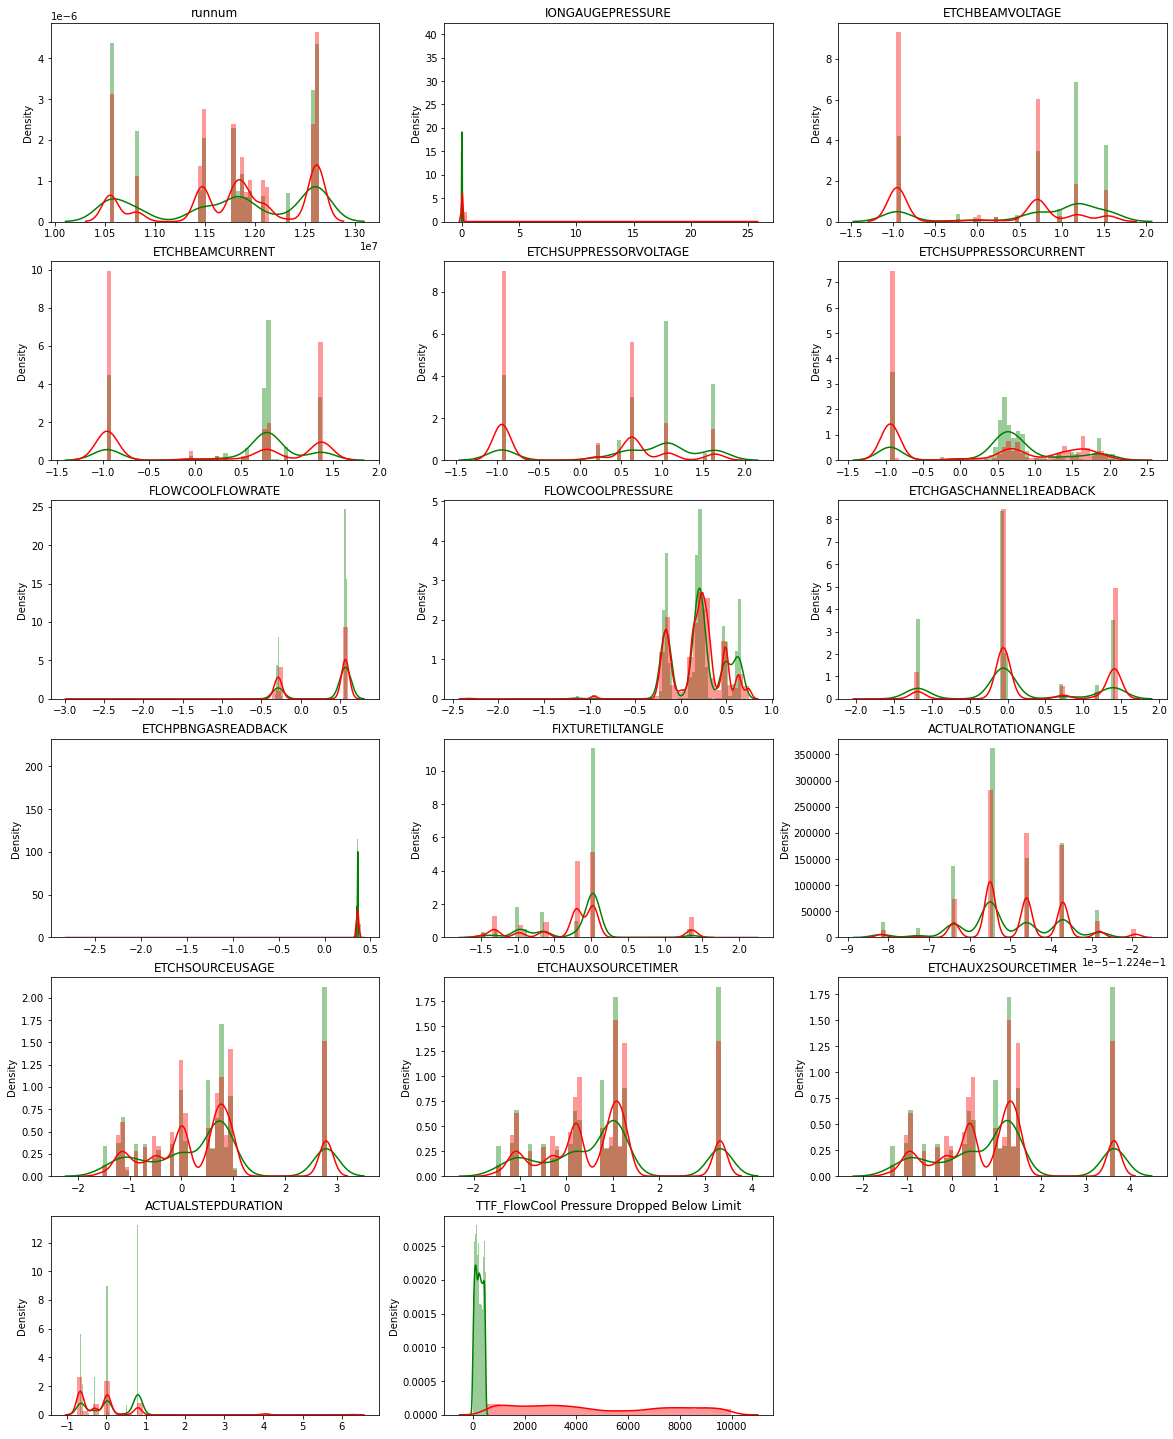

In [ ]:
columns =df1.drop(['IsFailure'], axis=1).columns
grid = gridspec.GridSpec(7, 3)

plt.figure(figsize=(20,30))

for n, col in enumerate(df1[columns]):
    ax = plt.subplot(grid[n])
    sns.distplot(df1[df1.IsFailure==1][col], bins = 50, color='g')
    sns.distplot(df1[df1.IsFailure==0][col], bins = 50, color='r') 
    ax.set_ylabel('Density')
    ax.set_title(str(col))
    ax.set_xlabel('')
    
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

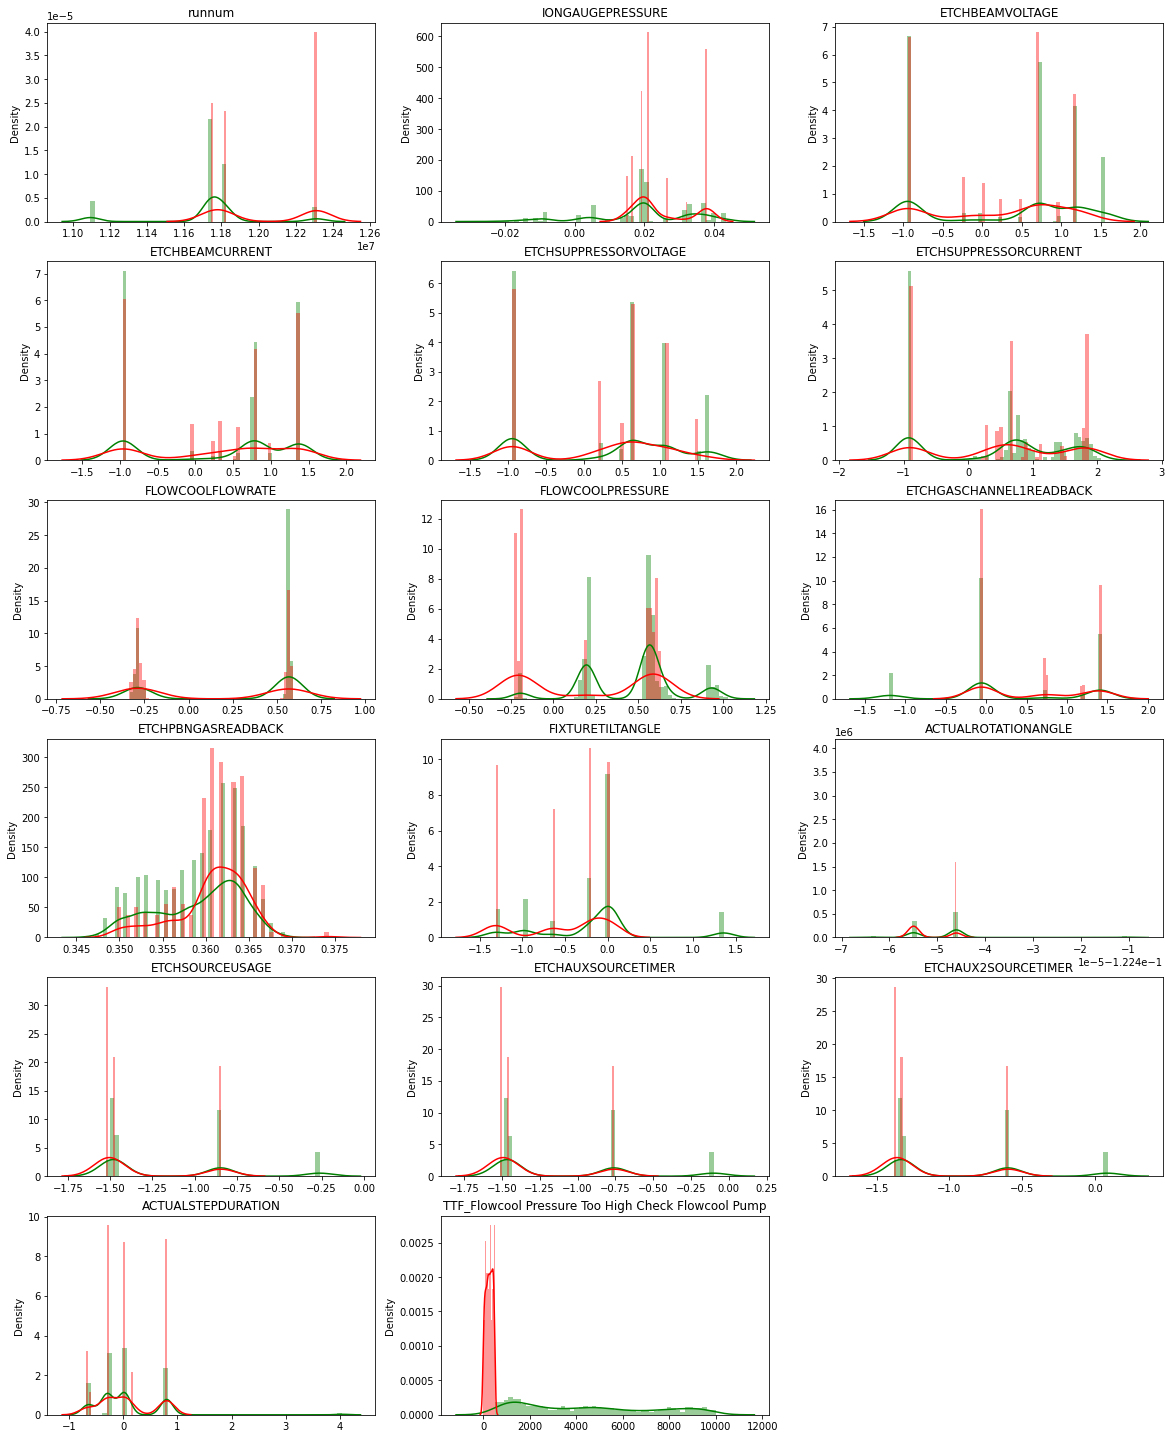

In [ ]:
columns1 =df2.drop(['IsFailure'], axis=1).columns
grid = gridspec.GridSpec(7, 3)

plt.figure(figsize=(20,30))

for n, col in enumerate(df2[columns1]):
    ax = plt.subplot(grid[n])
    sns.distplot(df2[df2.IsFailure==1][col], bins = 50, color='g')
    sns.distplot(df2[df2.IsFailure==0][col], bins = 50, color='r') 
    ax.set_ylabel('Density')
    ax.set_title(str(col))
    ax.set_xlabel('')
    
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

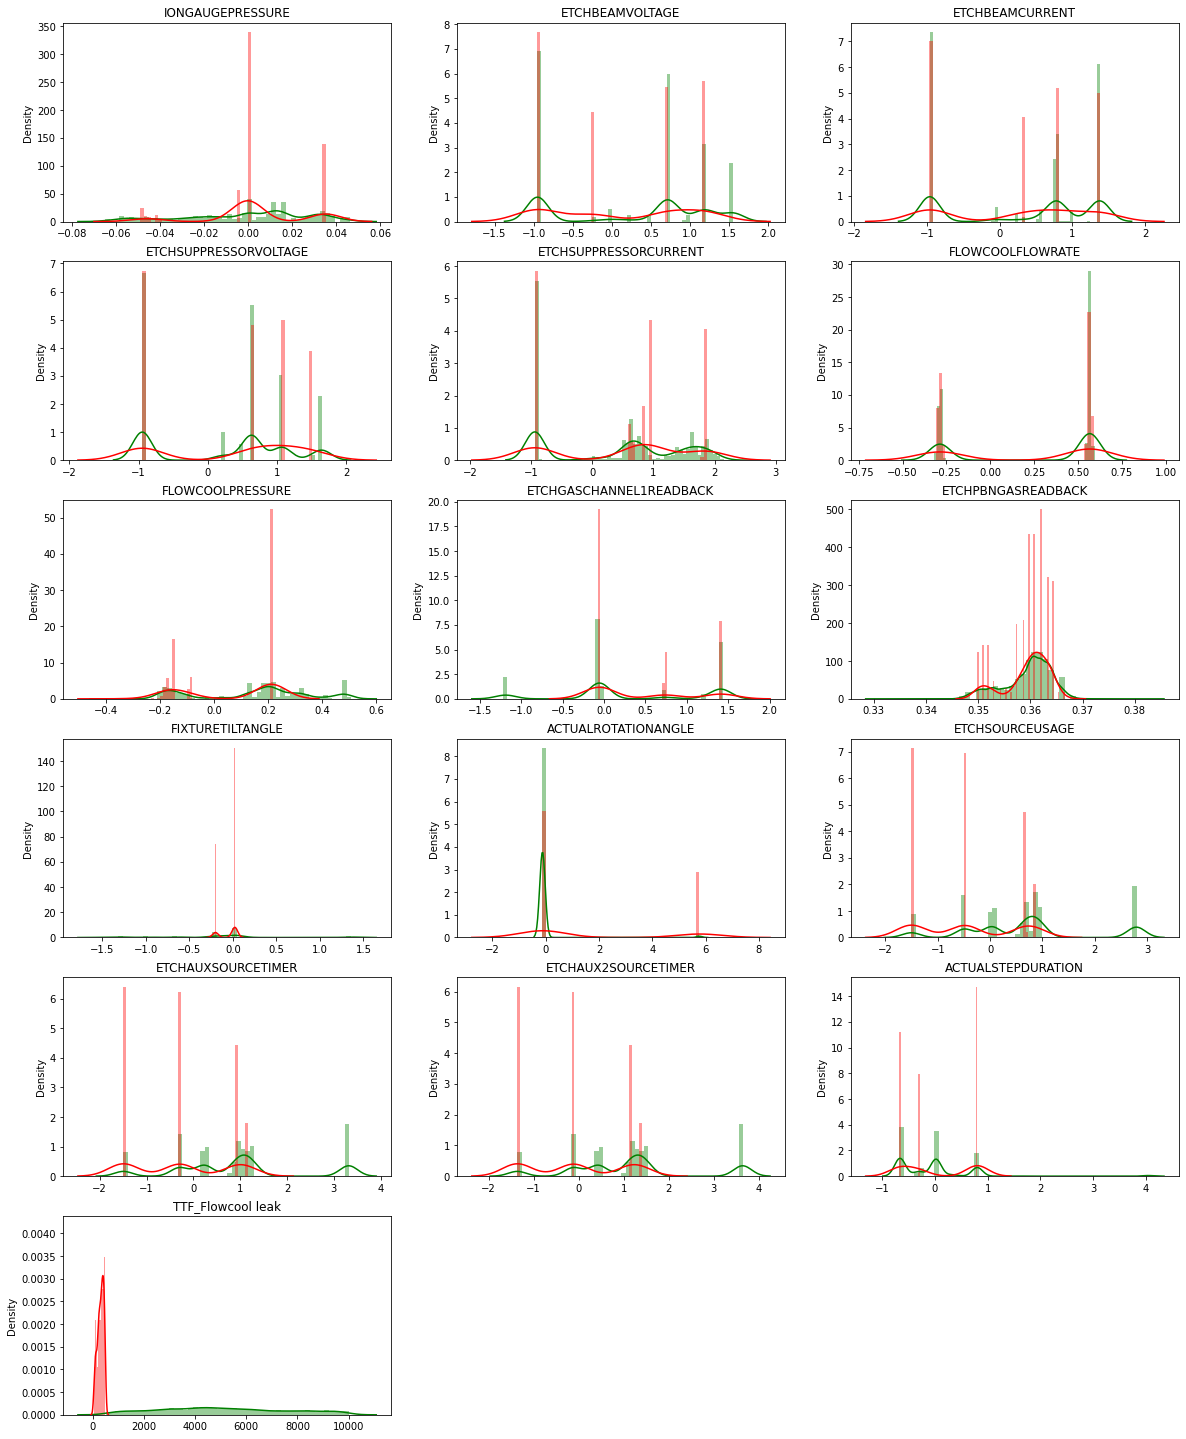

In [ ]:
columns2 =df3.drop(['IsFailure'], axis=1).columns
grid = gridspec.GridSpec(7, 3)

plt.figure(figsize=(20,30))

for n, col in enumerate(df3[columns2]):
    ax = plt.subplot(grid[n])
    sns.distplot(df3[df3.IsFailure==1][col], bins = 50, color='g')
    sns.distplot(df3[df3.IsFailure==0][col], bins = 50, color='r') 
    ax.set_ylabel('Density')
    ax.set_title(str(col))
    ax.set_xlabel('')
    
plt.show()

In [ ]:
#Unsupervised learning detecting failure (anomaly detection)
#

In [ ]:
#Random forest classifier with 70-30 split. Using random seed
X= df1.drop(['TTF_FlowCool Pressure Dropped Below Limit','IsFailure'], axis=1)
y= df1['IsFailure']
ros = RandomOverSampler(sampling_strategy="not majority") # String
X_res, y_res = ros.fit_resample(X, y)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=1234)
#y_train.value_counts() / len(y_train)
y.value_counts() / len(y)

0.0    0.920717
1.0    0.079283
Name: IsFailure, dtype: float64

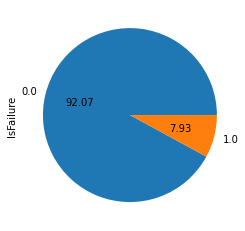

In [ ]:
# Show pie plot (Approach 1)
y.value_counts().plot.pie(autopct='%.2f')

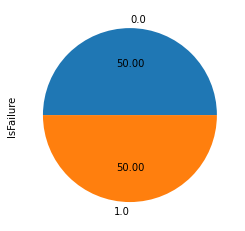

In [ ]:
y_res.value_counts() / len(y_res)
# Show pie plot
y_res.value_counts().plot.pie(autopct='%.2f')

In [ ]:
# test train split using the oversampling technique

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.30, random_state=1234)

In [ ]:
y_test.value_counts() / len(y_test)

0.0    0.50077
1.0    0.49923
Name: IsFailure, dtype: float64

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import plot_confusion_matrix
from statistics import mean

Mean f1: 0.994
Mean recall: 0.993
Mean precision: 0.995


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


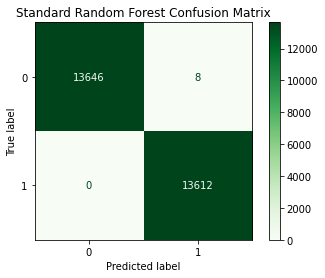

In [ ]:
#Build SRF model
SRF = RandomForestClassifier(n_estimators=150, random_state=0)
#Create Stratified K-fold cross validation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scoring = ('f1', 'recall', 'precision')
#Evaluate SRF model
scores = cross_validate(SRF, X, y, scoring=scoring, cv=cv)
#Get average evaluation metrics
print('Mean f1: %.3f' % mean(scores['test_f1']))
print('Mean recall: %.3f' % mean(scores['test_recall']))
print('Mean precision: %.3f' % mean(scores['test_precision']))

#Train SRF
SRF.fit(X_train, y_train)
#SRF prediction result
y_pred = SRF.predict(X_test)
#Create confusion matrix
fig = plot_confusion_matrix(SRF, X_test, y_test, display_labels=['0', '1'], cmap='Greens')
plt.title('Standard Random Forest Confusion Matrix')
plt.show()

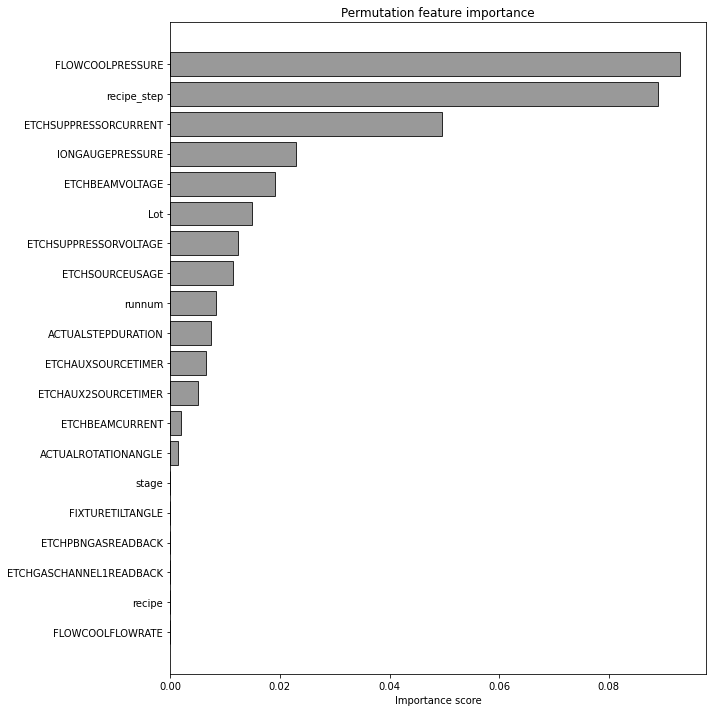

In [ ]:
############################### Permutation feature importance #####################################

imp = rfpimp.importances(SRF, X_test, y_test)

############################################## Plot ################################################

fig, ax = plt.subplots(figsize=(6, 3))

ax.barh(imp.index, imp['Importance'], height=0.8, facecolor='grey', alpha=0.8, edgecolor='k')
ax.set_xlabel('Importance score')
ax.set_title('Permutation feature importance')
# ax.text(0.8, 0.15, 'aegis4048.github.io', fontsize=12, ha='center', va='center',
#         transform=ax.transAxes, color='grey', alpha=0.5)
plt.gca().invert_yaxis()
fig.set_size_inches(10, 10)

fig.tight_layout()

Mean f1: 0.948
Mean recall: 0.999
Mean precision: 0.902


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


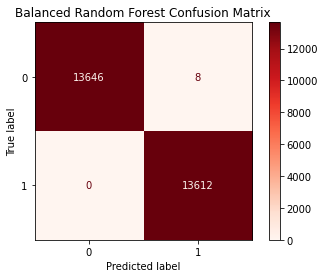

In [ ]:
from imblearn.ensemble import BalancedRandomForestClassifier

#Build SRF model
BRFC = BalancedRandomForestClassifier(n_estimators=150, random_state=2)
#Create Stratified K-fold cross validation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scoring = ('f1', 'recall', 'precision')
#Evaluate BRFC model
scores = cross_validate(BRFC, X, y, scoring=scoring, cv=cv)
#Get average evaluation metrics
print('Mean f1: %.3f' % mean(scores['test_f1']))
print('Mean recall: %.3f' % mean(scores['test_recall']))
print('Mean precision: %.3f' % mean(scores['test_precision']))

#Train BRFC
BRFC.fit(X_train, y_train)
#BRFC prediction result
y_pred = BRFC.predict(X_test)
#Create confusion matrix
fig = plot_confusion_matrix(BRFC, X_test, y_test, display_labels=['0', '1'], cmap='Reds')
plt.title('Balanced Random Forest Confusion Matrix')
plt.show()

Mean f1: 0.998
Mean recall: 0.997
Mean precision: 0.998


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


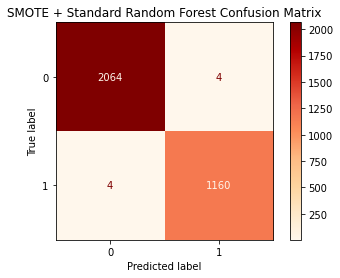

In [ ]:
from imblearn.over_sampling import SMOTE

#Use SMOTE to oversample the minority class
oversample = SMOTE()
over_X, over_y = oversample.fit_resample(X, y)
over_X_train, over_X_test, over_y_train, over_y_test = train_test_split(over_X, over_y, test_size=0.3, stratify=over_y)
#Build SMOTE SRF model
SMOTE_SRF = RandomForestClassifier(n_estimators=150, random_state=0)
#Create Stratified K-fold cross validation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scoring = ('f1', 'recall', 'precision')
#Evaluate SMOTE SRF model
scores = cross_validate(SMOTE_SRF, over_X, over_y, scoring=scoring, cv=cv)
#Get average evaluation metrics
print('Mean f1: %.3f' % mean(scores['test_f1']))
print('Mean recall: %.3f' % mean(scores['test_recall']))
print('Mean precision: %.3f' % mean(scores['test_precision']))

##Randomly spilt dataset to test and train set
##X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y)
#Train SMOTE SRF
SMOTE_SRF.fit(over_X_train, over_y_train)
#SMOTE SRF prediction result
y_pred = SMOTE_SRF.predict(X_test)
#Create confusion matrix
fig = plot_confusion_matrix(SMOTE_SRF, X_test, y_test, display_labels=['0', '1'], cmap='OrRd')
plt.title('SMOTE + Standard Random Forest Confusion Matrix')
plt.show()

In [ ]:
# creat a list of columns to be dropped using the initial EDA that was done, looking at the plots we know that IONGAUGEPRESSURE, ETCHPBNGASREADBACK, ROTATIONSPEED, 
# ACTUALROTATIONANGLE are constant so we can drop them from analysis
cols_droplist = ['Tool', 'IONGAUGEPRESSURE', 'ETCHPBNGASREADBACK','ROTATIONSPEED', 'ACTUALROTATIONANGLE']
df_combined = df_combined.drop(columns=cols_droplist)
df_combined.shape

(5110542, 23)

In [ ]:
print(df_combined['FIXTURESHUTTERPOSITION'].value_counts())

1.0      4101355
0.0       950342
3.0        29652
2.0        29051
255.0        135
Name: FIXTURESHUTTERPOSITION, dtype: int64


In [ ]:
df_combined = df_combined.loc[df_combined['FIXTURESHUTTERPOSITION'] == 1]
df_combined.shape

(4101355, 29)

In [ ]:
pd.set_option('display.max_columns', None)
df_combined.tail(20)


,time,stage,Lot,runnum,recipe,recipe_step,ETCHBEAMVOLTAGE,ETCHBEAMCURRENT,ETCHSUPPRESSORVOLTAGE,ETCHSUPPRESSORCURRENT,FLOWCOOLFLOWRATE,FLOWCOOLPRESSURE,ETCHGASCHANNEL1READBACK,FIXTURETILTANGLE,FIXTURESHUTTERPOSITION,ETCHSOURCEUSAGE,ETCHAUXSOURCETIMER,ETCHAUX2SOURCETIMER,ACTUALSTEPDURATION,TTF_FlowCool Pressure Dropped Below Limit,TTF_Flowcool Pressure Too High Check Flowcool Pump,TTF_Flowcool leak,fault_name
5110522,39789764,1,9978,12838177,67,27,0.711012,1.375521,0.637174,1.848472,-0.302623,-0.118977,1.413639,0.022131,1.0,-0.184762,-0.021755,0.168030,-0.30499,NaN,NaN,NaN,NaN
5110523,39789768,1,9978,12838177,67,27,0.711183,1.379493,0.637403,1.855353,-0.258682,-0.113837,1.413639,0.022131,1.0,-0.184759,-0.021751,0.168034,-0.30499,NaN,NaN,NaN,NaN
5110524,39789772,1,9978,12838177,67,27,0.709876,1.376939,0.636897,1.853976,-0.319235,-0.115775,1.411886,0.022131,1.0,-0.184756,-0.021749,0.168036,-0.30499,NaN,NaN,NaN,NaN
5110525,39789776,1,9978,12838177,67,27,0.709762,1.373111,0.636761,1.840909,-0.295829,-0.122200,1.411886,0.022131,1.0,-0.184752,-0.021745,0.168040,-0.30499,NaN,NaN,NaN,NaN
5110526,39789780,1,9978,12838177,67,27,0.709648,1.373749,0.636851,1.846068,-0.296733,-0.117692,1.411886,0.022131,1.0,-0.184749,-0.021742,0.168044,-0.30499,NaN,NaN,NaN,NaN
5110527,39789784,1,9978,12838177,67,27,0.711466,1.378360,0.637128,1.853631,-0.302623,-0.117060,1.424642,0.022131,1.0,-0.184746,-0.021738,0.168048,-0.30499,NaN,NaN,NaN,NaN
5110528,39789788,1,9978,12838177,67,27,0.710501,1.376301,0.636808,1.850883,-0.276198,-0.120262,1.424642,0.022131,1.0,-0.184742,-0.021734,0.168052,-0.30499,NaN,NaN,NaN,NaN
5110529,39789792,1,9978,12838177,67,27,0.709419,1.367436,0.637082,1.813400,-0.325275,-0.109350,1.410382,0.022131,1.0,-0.184739,-0.021731,0.168055,-0.30499,NaN,NaN,NaN,NaN
5110530,39789796,1,9978,12838177,67,27,0.711354,1.374033,0.637403,1.832314,-0.239054,-0.109350,1.410382,0.022131,1.0,-0.184736,-0.021727,0.168059,-0.30499,NaN,NaN,NaN,NaN
5110531,39789800,1,9978,12838177,67,27,0.709648,1.376585,0.636715,1.840565,-0.263664,-0.118345,1.410382,0.022131,1.0,-0.184732,-0.021723,0.168063,-0.30499,NaN,NaN,NaN,NaN


In [ ]:
# new column called "Failure" and combine all failures to have a value of 1 and replace "Nan" with 0
fault_list = ['FlowCool Pressure Dropped Below Limit', 'Flowcool Pressure Too High Check Flowcool Pump', 'Flowcool leak']
df_combined['Failure'] = df_combined['fault_name'].replace(np.nan, 0)
for i in fault_list:
  df_combined['Failure'] = 1

df_combined.head()


,time,stage,Lot,runnum,recipe,recipe_step,ETCHBEAMVOLTAGE,ETCHBEAMCURRENT,ETCHSUPPRESSORVOLTAGE,ETCHSUPPRESSORCURRENT,FLOWCOOLFLOWRATE,FLOWCOOLPRESSURE,ETCHGASCHANNEL1READBACK,FIXTURETILTANGLE,FIXTURESHUTTERPOSITION,ETCHSOURCEUSAGE,ETCHAUXSOURCETIMER,ETCHAUX2SOURCETIMER,ACTUALSTEPDURATION,TTF_FlowCool Pressure Dropped Below Limit,TTF_Flowcool Pressure Too High Check Flowcool Pump,TTF_Flowcool leak,fault_name,Failure
49,3284030,1,9253,10511673,67,3,-0.005718,-0.061104,0.205618,-0.111415,-0.281180,-0.182636,0.736344,-0.646442,1.0,2.395414,2.871561,3.175993,4.037785,623036.0,9146272.0,632316.0,Flowcool Pressure Too High Check Flowcool Pump,1
50,3284034,1,9253,10511673,67,3,-0.005489,-0.056493,0.205800,-0.095256,-0.278160,-0.180066,0.736344,-0.646442,1.0,2.395417,2.871564,3.175997,4.037785,623032.0,9146268.0,632312.0,Flowcool Pressure Too High Check Flowcool Pump,1
51,3284038,1,9253,10511673,67,3,-0.005775,-0.060323,0.205754,-0.118296,-0.278160,-0.180066,0.737599,-0.646442,1.0,2.395420,2.871568,3.176000,4.037785,623028.0,9146264.0,632308.0,Flowcool Pressure Too High Check Flowcool Pump,1
52,3284042,1,9253,10511673,67,3,-0.005775,-0.061814,0.205754,-0.122077,-0.278160,-0.180066,0.737599,-0.646442,1.0,2.395422,2.871572,3.176004,4.037785,623024.0,9146260.0,632304.0,Flowcool Pressure Too High Check Flowcool Pump,1
53,3284046,1,9253,10511673,67,3,-0.005375,-0.055429,0.205526,-0.104886,-0.276198,-0.180066,0.740845,-0.646442,1.0,2.395427,2.871576,3.176008,4.037785,623020.0,9146256.0,632300.0,FlowCool Pressure Dropped Below Limit,1


In [ ]:
df_combined.shape

(4101355, 24)

In [ ]:
%pip install mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
%pip install mlxtend --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.3 MB 27.2 MB/s 
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [ ]:
import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix
scatterplotmatrix(df_train[cols_train].values, figsize= (20,10), names=cols_train, alpha=0.5)
plt.tight_layout()
plt.show()

NameError: ignored

In [ ]:
df_train.plot(subplots=True,
          layout=(1, 4),
          sharex=False,
          sharey=False,
          colormap='viridis',
         fontsize=8,
         legend=False,
         linewidth=0.2);
plt.tight_layout();

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


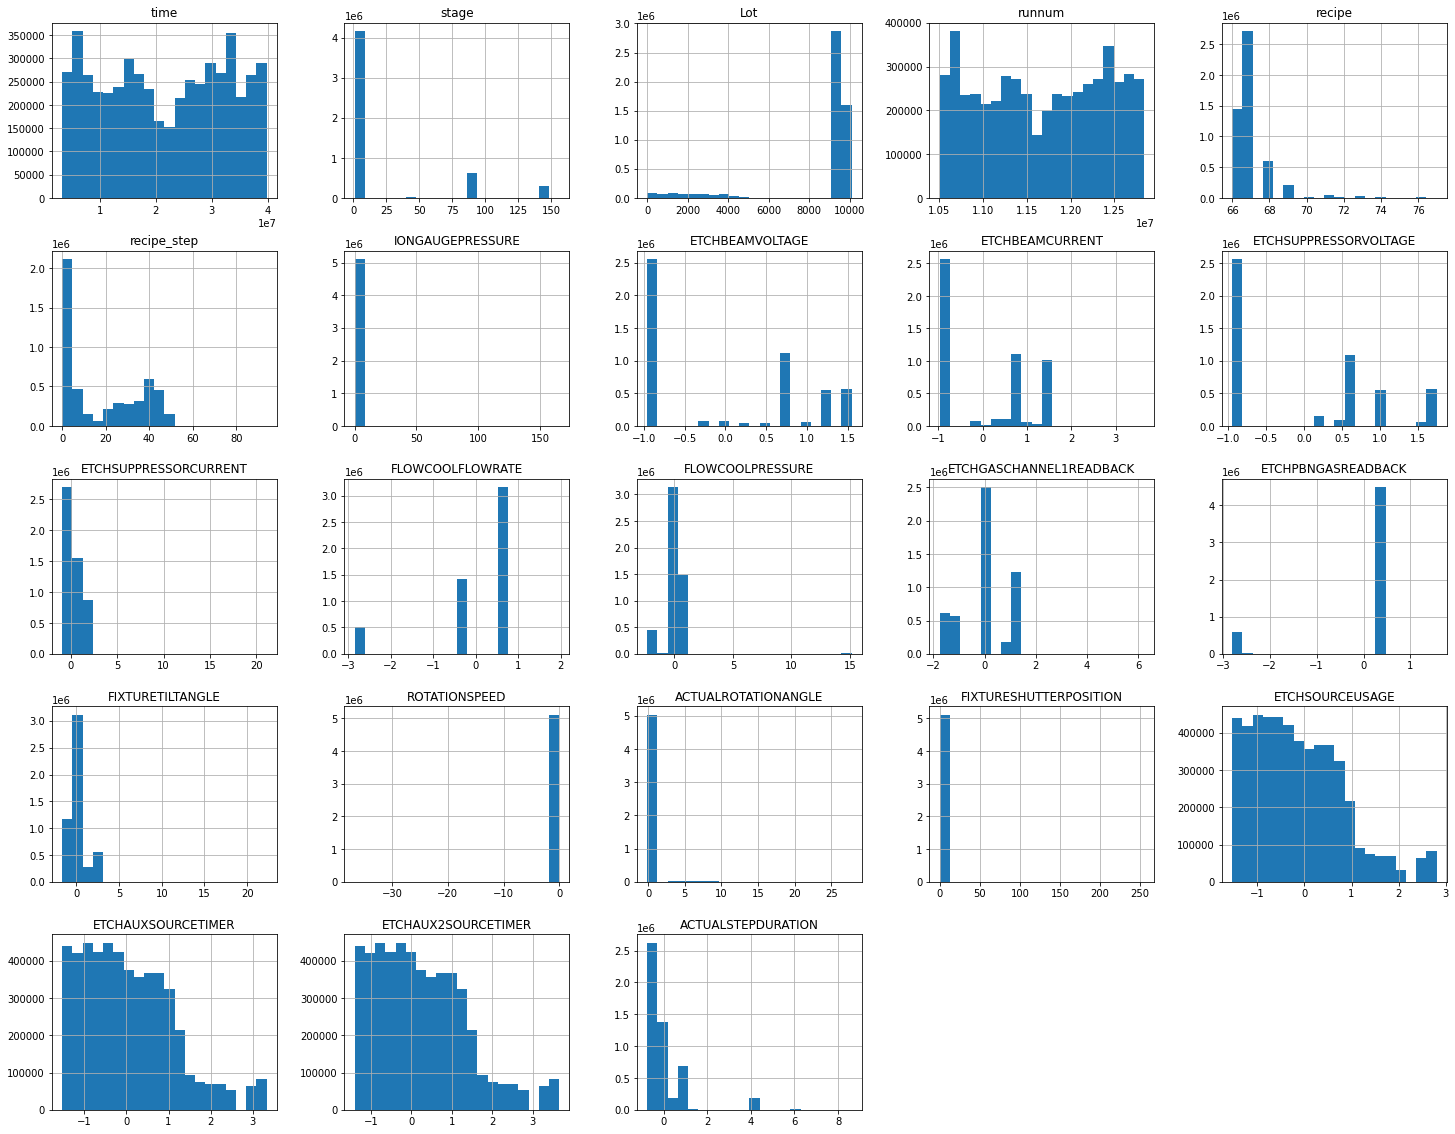

In [ ]:
fig = plt.figure(figsize = (25,20))
ax = fig.gca()
hist = df_train.hist(bins=20, ax = ax)

KeyboardInterrupt: ignored

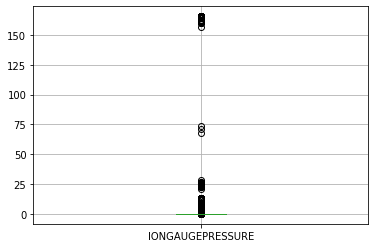

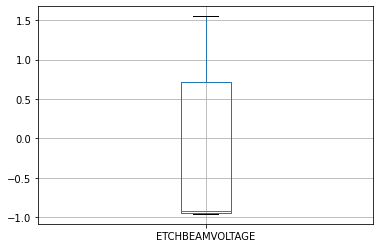

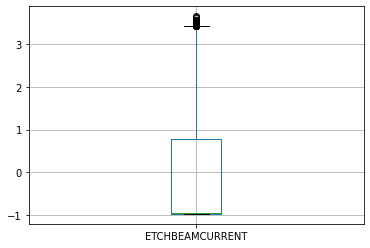

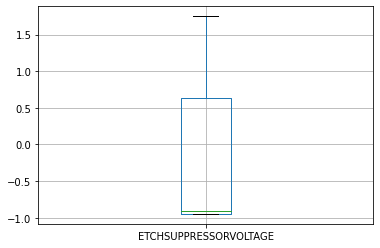

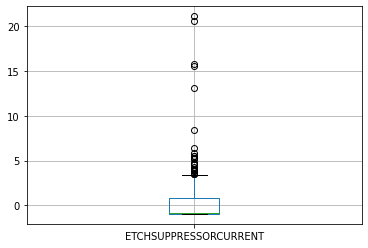

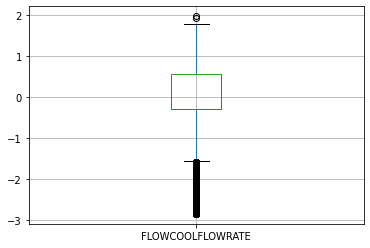

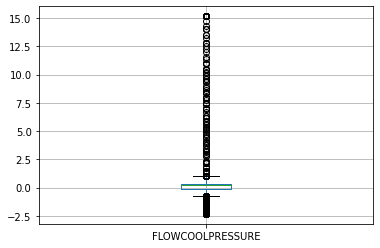

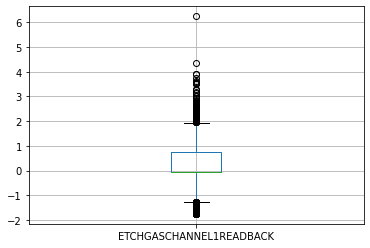

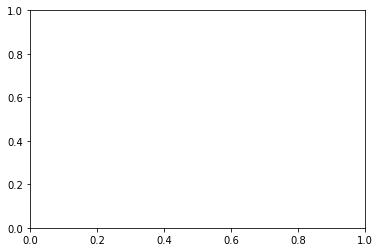

In [ ]:
for column in df_train.columns[7:]:
    plt.figure()
    df_train.boxplot([column])